In [63]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [64]:
train=pd.read_csv("CustomerChurn.csv")
test=pd.read_csv("Tobepredicted.csv")

In [65]:
train.head()

,ID,CallFailure,Complaints,SubscriptionLength,ChargeAmount,SecondsofUse,Frequencyofuse,FrequencyofSMS,DistinctCalledNumbers,AgeGroup,TariffPlan,Status,Age,CustomerValue,Churn
0,1,8,0,38,0,4370,71,5,17,3,1,1,30,197.640,0
1,2,0,0,39,0,318,5,7,4,2,1,2,25,46.035,0
2,3,10,0,37,0,2453,60,359,24,3,1,1,30,1536.520,0
3,4,10,0,38,0,4198,66,1,35,1,1,1,15,240.020,0
4,5,3,0,38,0,2393,58,2,33,1,1,1,15,145.805,0


In [66]:
train.describe()

,ID,CallFailure,Complaints,SubscriptionLength,ChargeAmount,SecondsofUse,Frequencyofuse,FrequencyofSMS,DistinctCalledNumbers,AgeGroup,TariffPlan,Status,Age,CustomerValue,Churn
count,2199.000000,2199.000000,2199.000000,2199.000000,2199.000000,2199.000000,2199.000000,2199.000000,2199.000000,2199.000000,2199.000000,2199.000000,2199.000000,2199.000000,2199.000000
mean,1100.000000,5.768076,0.075034,31.733060,0.712597,4345.281946,66.991814,70.604366,22.703502,2.730332,1.073670,1.243292,30.211460,465.255352,0.160073
std,634.940942,6.607745,0.263506,8.483574,1.386330,4192.701613,57.269290,111.995921,17.140572,0.876622,0.261292,0.429168,8.464363,523.393421,0.366757
min,1.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,15.000000,0.000000,0.000000
25%,550.500000,0.000000,0.000000,29.000000,0.000000,1299.000000,25.000000,0.000000,10.000000,2.000000,1.000000,1.000000,25.000000,103.780000,0.000000
50%,1100.000000,4.000000,0.000000,34.000000,0.000000,2852.000000,51.000000,18.000000,20.000000,3.000000,1.000000,1.000000,30.000000,220.880000,0.000000
75%,1649.500000,9.000000,0.000000,37.000000,1.000000,6370.000000,92.000000,85.000000,33.000000,3.000000,1.000000,1.000000,30.000000,780.165000,0.000000
max,2199.000000,33.000000,1.000000,45.000000,10.000000,16785.000000,249.000000,515.000000,95.000000,5.000000,2.000000,2.000000,55.000000,2165.280000,1.000000


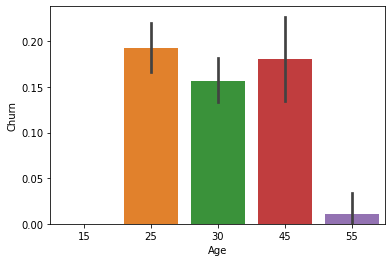

In [67]:
sns.barplot(x='Age',y='Churn',data=train)

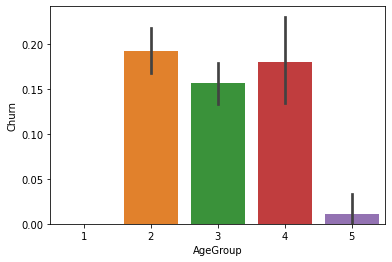

In [68]:
sns.barplot(x='AgeGroup',y='Churn',data=train)

In [69]:
OID=test['ID']
train.drop(['ID'],axis=1,inplace=True)
test.drop(['ID'],axis=1,inplace=True)

TRAINIG AND SPLITING THE MODEL

In [70]:
from sklearn.model_selection import train_test_split
X=train.drop(['Churn'],axis=1)
y=train["Churn"]
X_train_,X_test,y_train,y_test=train_test_split(X,y ,test_size=0.30,random_state=101)

In [71]:
test.head()

,CallFailure,Complaints,SubscriptionLength,ChargeAmount,SecondsofUse,Frequencyofuse,FrequencyofSMS,DistinctCalledNumbers,AgeGroup,TariffPlan,Status,Age,CustomerValue
0,11,1,13,3,1853,28,12,11,3,1,1,30,123.24
1,10,0,38,1,4615,74,7,17,3,1,1,30,215.56
2,5,0,39,0,563,8,9,4,3,1,2,30,58.84
3,12,0,37,1,2698,63,361,24,3,1,1,30,1554.44
4,12,0,38,1,4443,69,7,35,1,1,1,15,286.66


In [72]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 951 entries, 0 to 950
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   CallFailure            951 non-null    int64  
 1   Complaints             951 non-null    int64  
 2   SubscriptionLength     951 non-null    int64  
 3   ChargeAmount           951 non-null    int64  
 4   SecondsofUse           951 non-null    int64  
 5   Frequencyofuse         951 non-null    int64  
 6   FrequencyofSMS         951 non-null    int64  
 7   DistinctCalledNumbers  951 non-null    int64  
 8   AgeGroup               951 non-null    int64  
 9   TariffPlan             951 non-null    int64  
 10  Status                 951 non-null    int64  
 11  Age                    951 non-null    int64  
 12  CustomerValue          951 non-null    float64
dtypes: float64(1), int64(12)
memory usage: 96.7 KB


In [73]:
test.isnull().sum()

CallFailure              0
Complaints               0
SubscriptionLength       0
ChargeAmount             0
SecondsofUse             0
Frequencyofuse           0
FrequencyofSMS           0
DistinctCalledNumbers    0
AgeGroup                 0
TariffPlan               0
Status                   0
Age                      0
CustomerValue            0
dtype: int64

In [74]:
test.head()

,CallFailure,Complaints,SubscriptionLength,ChargeAmount,SecondsofUse,Frequencyofuse,FrequencyofSMS,DistinctCalledNumbers,AgeGroup,TariffPlan,Status,Age,CustomerValue
0,11,1,13,3,1853,28,12,11,3,1,1,30,123.24
1,10,0,38,1,4615,74,7,17,3,1,1,30,215.56
2,5,0,39,0,563,8,9,4,3,1,2,30,58.84
3,12,0,37,1,2698,63,361,24,3,1,1,30,1554.44
4,12,0,38,1,4443,69,7,35,1,1,1,15,286.66


In [75]:
train.head()

,CallFailure,Complaints,SubscriptionLength,ChargeAmount,SecondsofUse,Frequencyofuse,FrequencyofSMS,DistinctCalledNumbers,AgeGroup,TariffPlan,Status,Age,CustomerValue,Churn
0,8,0,38,0,4370,71,5,17,3,1,1,30,197.640,0
1,0,0,39,0,318,5,7,4,2,1,2,25,46.035,0
2,10,0,37,0,2453,60,359,24,3,1,1,30,1536.520,0
3,10,0,38,0,4198,66,1,35,1,1,1,15,240.020,0
4,3,0,38,0,2393,58,2,33,1,1,1,15,145.805,0


In [76]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

1.GaussianNB Model

In [77]:
from sklearn.naive_bayes import GaussianNB
gauss=GaussianNB()
gauss.fit(X_train_,y_train)
y_gauss=gauss.predict(X_test)

In [78]:
y_gauss
acc_gauss=round(accuracy_score(y_gauss,y_test)*100)
acc_gauss

75

In [79]:
f_gauss=f1_score(y_test,y_gauss)
f_gauss

0.5543478260869564

In [80]:
r_gauss=roc_auc_score(y_test,y_gauss)
r_gauss

0.8218181818181818

2.Perceptron Model

In [81]:
from sklearn.linear_model import Perceptron
percep=Perceptron()
percep.fit(X_train_,y_train)
y_percep=percep.predict(X_test)
y_percep

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,

In [82]:
acc_percep=round(accuracy_score(y_percep,y_test)*100)
acc_percep

83

In [83]:
f_percep=f1_score(y_test,y_percep)
f_percep

0.3393939393939393

In [84]:
r_percep=roc_auc_score(y_test,y_percep)
r_percep

0.6027272727272727

3.DecisionTreeClassifier Model

In [85]:
from sklearn.tree import DecisionTreeClassifier
decitree=DecisionTreeClassifier()
decitree.fit(X_train_,y_train)
y_decitree=decitree.predict(X_test)
y_decitree

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,

In [86]:
acc_decitree=round(accuracy_score(y_decitree,y_test)*100)
acc_decitree

94

In [87]:
f_decitree=f1_score(y_test,y_decitree)
f_decitree

0.8256880733944955

In [88]:
r_decitree=roc_auc_score(y_test,y_decitree)
r_decitree

0.8927272727272728

4.RandomForestClassifier Model

In [89]:
from sklearn.ensemble import RandomForestClassifier
random=RandomForestClassifier()
random.fit(X_train_,y_train)
y_random=random.predict(X_test)
y_random


array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,

In [90]:
acc_random=round(accuracy_score(y_random,y_test)*100)
acc_random

96

In [91]:
f_random=f1_score(y_test,y_random)
f_random

0.8878504672897196

In [92]:
r_random=roc_auc_score(y_test,y_random)
r_random

0.9236363636363637

5.KNeighborsClassifier Model

In [93]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(X_train_,y_train)
y_knn=knn.predict(X_test)
y_knn



array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0,

In [94]:
acc_knn=round(accuracy_score(y_knn,y_test)*100)
acc_knn

85

In [95]:
f_knn=f1_score(y_test,y_knn)
f_knn

0.45303867403314924

In [96]:
r_knn=roc_auc_score(y_test,y_knn)
r_knn

0.6590909090909091

6.SGDClassifier Model

In [97]:
from sklearn.linear_model import SGDClassifier
sgd=SGDClassifier()
sgd.fit(X_train_,y_train)
y_sgd=sgd.predict(X_test)
y_sgd



array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,

In [98]:
acc_sgd=round(accuracy_score(y_sgd,y_test)*100)
acc_sgd

83

In [99]:
f_sgd=f1_score(y_test,y_sgd)
f_sgd

0.3312883435582822

In [100]:
r_sgd=roc_auc_score(y_test,y_sgd)
r_sgd

0.599090909090909

7.GradientBoostingClassifier Model

In [101]:
from sklearn.ensemble import GradientBoostingClassifier
gbk=GradientBoostingClassifier()
gbk.fit(X_train_,y_train)
y_gbk=gbk.predict(X_test)
y_gbk


array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,

In [102]:
acc_gbk=round(accuracy_score(y_gbk,y_test)*100)
acc_gbk

96

In [103]:
f_gbk=f1_score(y_test,y_gbk)
f_gbk

0.8837209302325582

In [104]:
r_gbk=roc_auc_score(y_test,y_gbk)
r_gbk

0.9227272727272727

8.XGB Classifier Model

In [105]:
import xgboost as xbg
from xgboost import XGBClassifier
xgb=XGBClassifier()
xgb.fit(X_train_,y_train)
y_xgb=xgb.predict(X_test)
y_xgb



array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,

In [106]:
acc_xgb=round(accuracy_score(y_xgb,y_test)*100)
acc_xgb

96

In [107]:
f_xgb=f1_score(y_test,y_xgb)
f_xgb

0.8663594470046083

In [108]:
r_xgb=roc_auc_score(y_test,y_xgb)
r_xgb

0.9154545454545454

CHOOSING THE GBK MODEL TO PREDICT THE CHURN OF THE TEST DATA SET BECAUSE THE F1 SCORE AND ACCURACY SCORE WAS HIGH COMPARING WITH OTHER MODELS

In [109]:
predictions=gbk.predict(test)
output1=pd.DataFrame({'ID':OID,'Churn':predictions})

In [110]:
output1.to_csv('submission1.csv')